<font size="18"> Testing audio feature extraction - MFCC </font>

In [2]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

1.13.1+cu116
0.13.1+cu116


In [3]:
from IPython.display import Audio
import librosa
import matplotlib.pyplot as plt
from torchaudio.utils import download_asset
torch.random.manual_seed(0)

SAMPLE_SPEECH = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")

def plot_waveform(waveform, sr, title="Waveform"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    figure.suptitle(title)
    plt.show(block=False)


def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


def plot_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")
    plt.show(block=False)

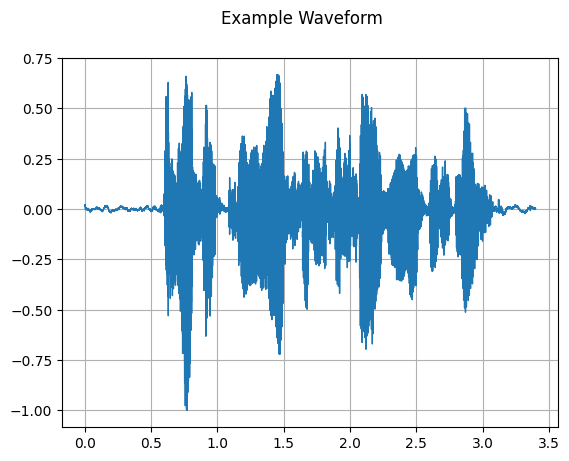

In [4]:
SPEECH_WAVEFORM, SAMPLE_RATE = torchaudio.load(SAMPLE_SPEECH)

plot_waveform(SPEECH_WAVEFORM, SAMPLE_RATE, title="Example Waveform")
Audio(SPEECH_WAVEFORM.numpy(), rate=SAMPLE_RATE)

In [5]:
# MFCC
n_fft = 2048
win_length = None
hop_length = 512
n_mels = 256
n_mfcc = 256
sample_rate = 6000

mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,
    melkwargs={
        "n_fft": n_fft,
        "n_mels": n_mels,
        "hop_length": hop_length,
        "mel_scale": "htk",
    },
)

mfcc = mfcc_transform(SPEECH_WAVEFORM)

In [6]:
mfcc

tensor([[[-4.9580e+02, -4.9482e+02, -4.9612e+02,  ..., -4.2226e+02,
          -4.0157e+02, -4.3528e+02],
         [ 7.6858e+01,  8.2947e+01,  8.2908e+01,  ...,  1.0710e+02,
           1.2769e+02,  1.1310e+02],
         [ 1.8454e+01,  2.2336e+01,  2.1795e+01,  ...,  2.4616e+01,
           1.8316e+01,  1.6142e+01],
         ...,
         [ 2.6870e+00,  2.9211e+00,  2.3788e+00,  ...,  1.9847e+00,
           1.8916e+00,  3.6914e-01],
         [ 4.1728e-01,  1.5918e+00,  8.6383e-01,  ..., -9.9495e-01,
          -9.3745e-01,  1.2627e+00],
         [-2.2189e+00, -1.6164e+00, -3.4868e-01,  ..., -2.1618e+00,
          -1.7864e+00,  7.8549e-01]]])

In [7]:
mfcc.size()

torch.Size([1, 256, 107])

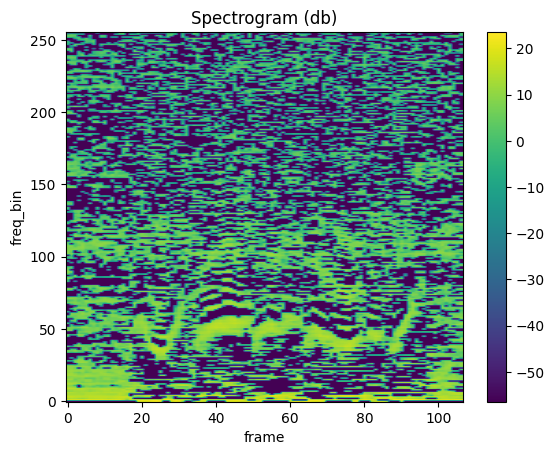

In [8]:
plot_spectrogram(mfcc[0])

In [27]:
import os
from pydub import AudioSegment

directory = "train_data"

for filename in os.listdir(directory):
    output_filename = "processed_wav/" + filename[:-3] + "wav"
    if not os.path.exists(output_filename):
        sound = AudioSegment.from_mp3(filename)
        sound.export(output_filename, format="wav")

FileNotFoundError: [Errno 2] No such file or directory: 'common_voice_en_35802912.mp3'